## EDA & Data Visualizations

- Since I want my recommender system to match on **4 criteria**: *Orientation*, *Age Range*, *Religion*, and *Offspring sentiment*, I decided to take a deeper look into the distribution of these features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in grouped cupid data
cupid_df = pd.read_pickle('data/grouped_cupid.pkl')

In [3]:
# preview data
cupid_df.head(3)

,age,sex,orientation,body_type,diet,drinks,drugs,offspring,pets,religion,smokes
0,22,m,straight,average,anything,sometimes,no,"doesn't have kid(s), but wants kid(s)",likes dogs and cats,agnosticism,sometimes
1,35,m,straight,average,other,yes,sometimes,"doesn't have kid(s), but wants kid(s)",likes dogs and cats,doesn't matter,no
2,38,m,straight,thin,anything,sometimes,no,doesn't have kids,likes cats,doesn't matter,no


---

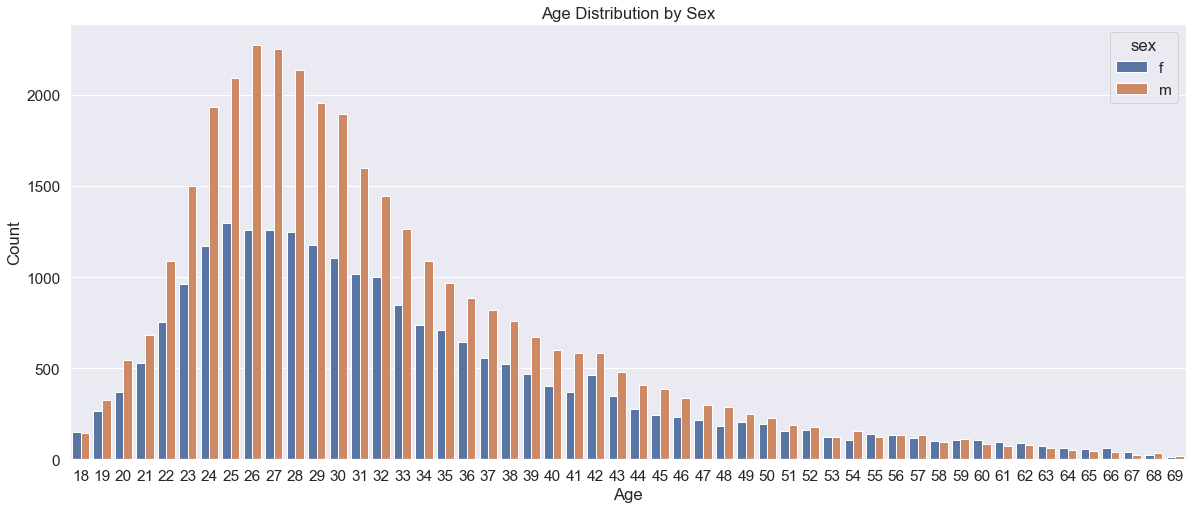

In [7]:
# count of age by sex

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.4)
sns.countplot(x = 'age', data = cupid_df, hue = 'sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex');

- The most popular age is 26, with most ages being from approx. 24 - 30
- More men are on the dating app than women (60% vs 40%)
- 50% more men are on the dating app than women (~35k vs. 23k)
- There are more older women on the app than men (~ ages 55+)

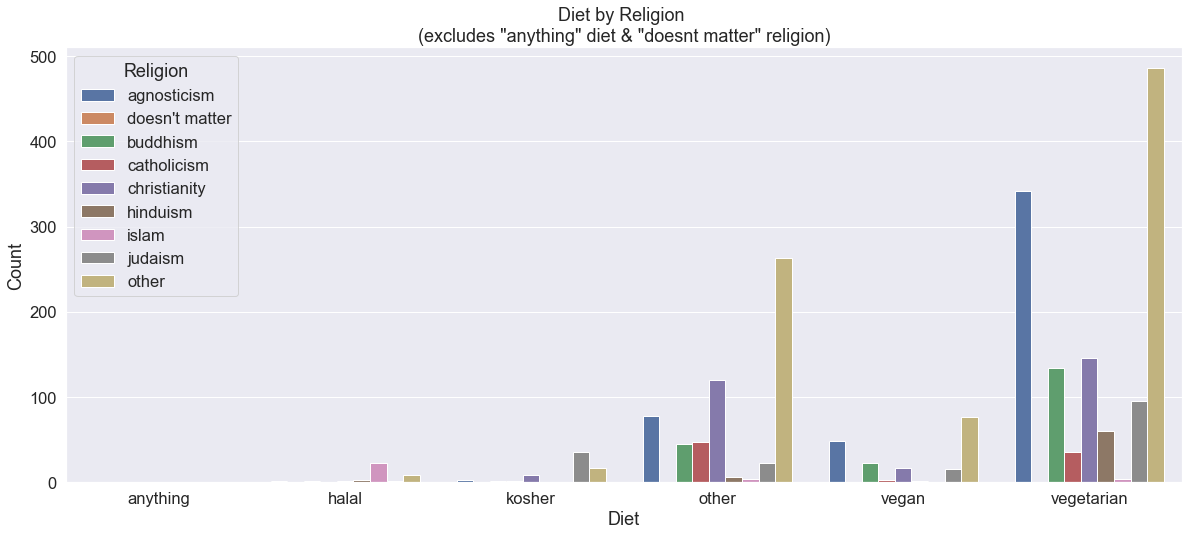

In [6]:
# excluded "anything" diet and "doesn't matter" religion, as those make up majority of the data
# so we can see the other features on a closer scale

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)
sns.countplot(x = 'diet', data = cupid_df[(cupid_df['diet'] != 'anything') & (cupid_df['religion'] != "doesn't matter")], hue = 'religion')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Diet by Religion \n(excludes "anything" diet & "doesnt matter" religion)')
plt.legend(loc = 'upper left').set_title('Religion');

- Aside from those who's diet consists of "anything", the data consists mostly of "vegetarian" diets
- Majority of religions follow a meat-less (vegetarian + vegan) diet. This makes sense, since a lot of the religions are unable to eat meat, for example (i.e. Halal, Judaism, Buddhism), unless prepared a specific way
- Halal diet is mostly for the Islam religion. Similarly, Kosher diet is mostly for the Judaism religion
- Not as many 'halal' or 'kosher' diets, which would potentially not have as many recommendations for users who have these diets
- Additionally, not as many 'hinduism' or 'islam' religions, which would also affect the recommendations, since "religion" would be a matching criteria that would determine recommendations
- Aside from those where religion doesn't matter, the data contains mostly 'agnosticism', 'christianity', and 'other' religions

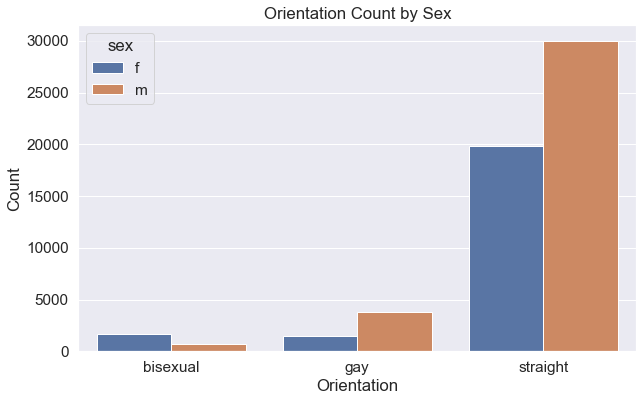

In [28]:
# orientation by sex count

plt.figure(figsize = (10,6))
sns.set(font_scale = 1.4)
sns.countplot(x = 'orientation', data = cupid_df, hue = 'sex')
plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation Count by Sex');

- Majority of the orientation in the data is 'straight'
- Less of 'bisexual' and 'gay' data points would affect the recommendations returned, especially if their religion and/or diet is niche (bisexual female, hinduism religion, halal diet)
- Mitigate the lack of potential matches by ensuring we match gay males/females to bisexual males/females as well
    - Ex) Gay male + Gay male or Bisexual male
    - Ex) Bisexual female + Bisexual male/female or Straight male or Gay female

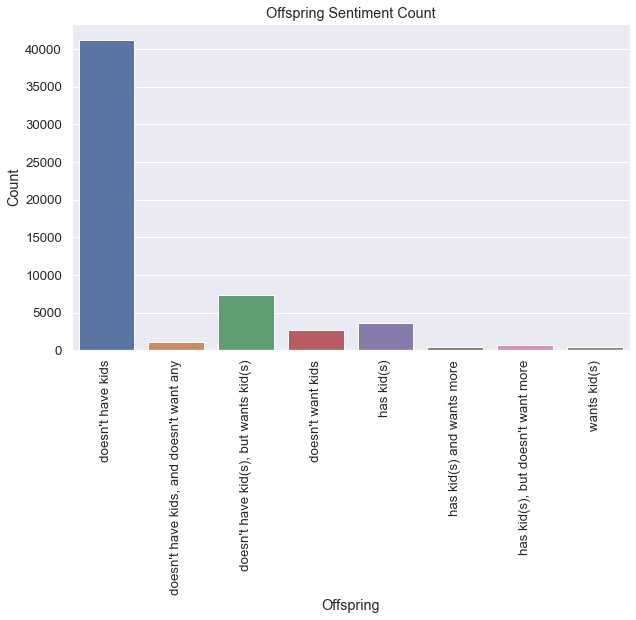

In [30]:
# offspring sentiment count

plt.figure(figsize = (10,6))
sns.set(font_scale = 1.2)
sns.countplot(x = 'offspring', data = cupid_df)
plt.xlabel('Offspring')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Offspring Sentiment Count');

- Majority of the dataset contains users who don't have kids, which would return an abundant of matches for those who don't have kids and/or don't want kids
- Lack of users who have kids, which would return a smaller pool of recommended profiles for those who want kids